# Übergangswahrscheinlichkeiten
###  Bestimme relative Übergangswahrscheinlichkeiten vom Zustand Home in Abhängigkeit des Zeitschrittes

### Zustände

* Zuhause -> 1
* Arbeit -> 2 
* Einkaufen -> 3 
* Freizeit -> 4
* Sonstiges -> 5

In [42]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv("C:\\Users\\thoma\\Desktop\\ev-modelling-repo\\Data\\NHTS_trips_processed.csv")

In [44]:
df.head()

,Unnamed: 0,ST_WOTAG,WHYFROM,W_SZ,W_AZ,W_NR,wegmin_imp1,zweck,wegkm,TRPTRANS,W_SZ_MIN,W_AZ_MIN
0,0,1,1,1000,1015,1,15,4,8.439,3,600,615
1,1,1,4,1510,1530,2,20,1,8.286,3,910,930
2,2,1,2,700,900,1,120,1,135.191,6,420,540
3,3,1,1,1800,2030,2,150,2,131.367,6,1080,1230
4,4,1,1,845,900,1,15,2,3.621,3,525,540


In [45]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [46]:
df.head()

,ST_WOTAG,WHYFROM,W_SZ,W_AZ,W_NR,wegmin_imp1,zweck,wegkm,TRPTRANS,W_SZ_MIN,W_AZ_MIN
0,1,1,1000,1015,1,15,4,8.439,3,600,615
1,1,4,1510,1530,2,20,1,8.286,3,910,930
2,1,2,700,900,1,120,1,135.191,6,420,540
3,1,1,1800,2030,2,150,2,131.367,6,1080,1230
4,1,1,845,900,1,15,2,3.621,3,525,540


## Betrachtung der Werktage

In [48]:
filt = df["ST_WOTAG"] < 6
df = df[filt]

In [49]:
df["ST_WOTAG"].value_counts()

5    133031
4    129219
3    126751
2    126668
1    117352
Name: ST_WOTAG, dtype: int64

# Zuordnen Satrtzeiten zu Zeitschritten
Schrittweite: t = 15 Minuten \
96 Zeitschritte pro Tag: W_SZ_t = [0, 96]

In [50]:
df["W_SZ_t"] = df["W_SZ_MIN"].apply(lambda x: round(x/15))

## Filtern nach Ausgangszustand = Zuhause

In [56]:
home = df[df["WHYFROM"]==1]

In [58]:
home["zweck"].value_counts()

2    62344
3    56361
4    54982
5    29755
1     6153
Name: zweck, dtype: int64

In [62]:
# Vernachlässige Rundreisen
filt = home["zweck"] > 1
home = home[filt]
home["zweck"].value_counts()

2    62344
3    56361
4    54982
5    29755
Name: zweck, dtype: int64

## Gruppieren der Trips nach Zeitschrit t des Wegbeginns

In [65]:
home_grpd = home.groupby(["W_SZ_t"])

In [130]:
home_grpd.get_group(1)

,ST_WOTAG,WHYFROM,W_SZ,W_AZ,W_NR,wegmin_imp1,zweck,wegkm,TRPTRANS,W_SZ_MIN,W_AZ_MIN,W_SZ_t
5440,3,1,15,30,5,15,5,10.408,4,15,30,1
5443,3,1,15,30,5,15,5,-1.000,4,15,30,1
132312,2,1,10,26,7,16,2,13.781,3,10,26,1
168774,4,1,10,20,6,10,3,1.690,3,10,20,1
318342,5,1,15,24,11,9,5,7.862,3,15,24,1
527232,1,1,15,30,5,15,4,10.147,3,15,30,1
536139,4,1,15,100,6,45,5,69.123,3,15,60,1
649438,4,1,15,45,4,30,3,39.422,4,15,45,1
660839,4,1,15,130,1,75,5,86.434,4,15,90,1
660840,4,1,10,130,1,80,5,-1.000,4,10,90,1


## Zuordnen der relativen Übergangswahrscheinlichkeiten zu den anderen Zuständen in jedem Zeitschritt

In [77]:
home_grpd.get_group(0)["zweck"].value_counts()

4    7
5    6
3    3
2    2
Name: zweck, dtype: int64

In [64]:
arbeit = [0 for i in range(97)]
einkaufen = [0 for i in range(97)]
freizeit = [0 for i in range(97)]
sonstiges = [0 for i in range(97)]

In [135]:
for t, group in home_grpd:
    counts = group["zweck"].value_counts(normalize=True)
    if counts.get(2):
        arbeit[t] = counts.get(2)
    if counts.get(3):
        einkaufen[t] = counts.get(3)
    if counts.get(4):
        freizeit[t] = counts.get(4)
    if counts.get(5):
        sonstiges[t] = counts.get(5)

## Visualisierung

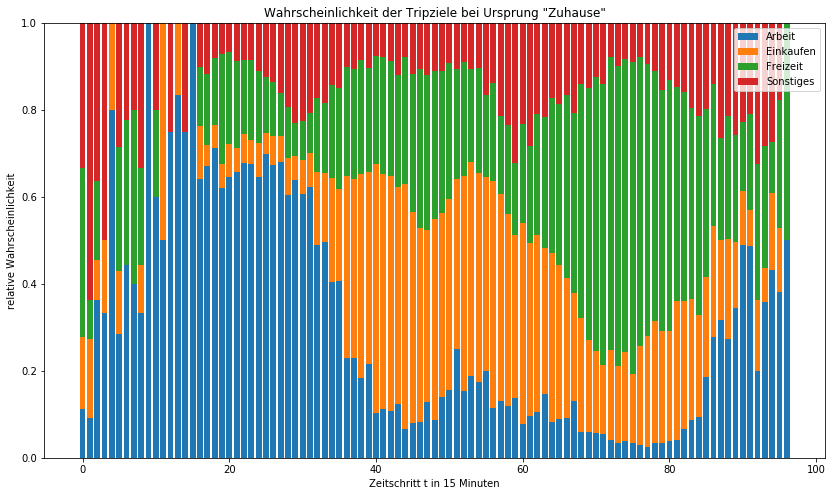

In [162]:
plt.figure(figsize=(14,8))
x = np.linspace(0,96, 97)
plt.bar(x, arbeit, label="Arbeit");
plt.bar(x, einkaufen, bottom=arbeit, label="Einkaufen");
plt.bar(x, freizeit, bottom=[i+j for i,j in zip(arbeit,einkaufen)], label="Freizeit");
plt.bar(x, sonstiges, bottom=[i+j+k for i,j,k in zip(arbeit,einkaufen,freizeit)], label="Sonstiges");
plt.xlabel("Zeitschritt t in 15 Minuten")
plt.ylabel("relative Wahrscheinlichkeit")
plt.title("Wahrscheinlichkeit der Tripziele bei Ursprung \"Zuhause\"");
plt.legend();
